In [26]:
from kapre.time_frequency import Melspectrogram, Spectrogram
from tensorflow.keras.models import Sequential
import librosa
import matplotlib.pyplot as plt
from matplotlib import cm
import os

In [76]:
viridis = cm.get_cmap('viridis', 12)
plt.set_cmap('viridis')

<Figure size 432x288 with 0 Axes>

In [6]:
mel_model = Sequential()
mel_model.add(Melspectrogram(sr=16000, n_mels=128, 
          n_dft=512, n_hop=160, input_shape=(1,16000),
          return_decibel_melgram=True,
          trainable_kernel=False, name='melgram'))

spec_model = Sequential()
spec_model.add(Spectrogram(n_dft=512,
                           return_decibel_spectrogram=True))

In [58]:
wav, _ = librosa.load('../wavfiles/Flute/3707da71.wav', sr=16000, mono=True)
print(wav.shape)

(141760,)


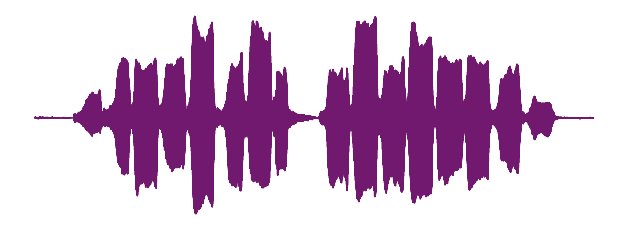

In [130]:
viridis = cm.get_cmap('inferno', 20)

fig, ax = plt.subplots(figsize=(11,4))
plt.plot(wav, color=viridis.colors[6,:3])
fig.patch.set_visible(False)
ax.axis('off')
plt.xticks([])
plt.yticks([])
plt.show()

In [60]:
wav_batch = wav.reshape(1,1,-1)

mel_model = Sequential()
mel_model.add(Melspectrogram(sr=16000, n_mels=128, 
          n_dft=512, n_hop=160, input_shape=(1,wav.shape[0]),
          return_decibel_melgram=True,
          trainable_kernel=False, name='melgram'))

spec_model = Sequential()
spec_model.add(Spectrogram(n_dft=512,
                           return_decibel_spectrogram=True))

Y = mel_model.predict(x=wav_batch).squeeze()
Y_spec = spec_model.predict(x=wav_batch).squeeze()

/home/seth/anaconda3/envs/audio/lib/python3.7/site-packages/librosa/filters.py:196: FutureWarning: norm=1 behavior will change in librosa 0.8.0. To maintain forward compatibility, use norm='slaney' instead.
  FutureWarning)


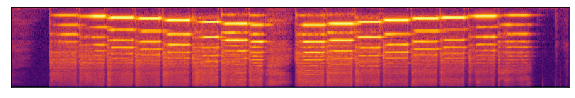

In [98]:
fig, ax = plt.subplots(figsize=(10,4))
plt.imshow(Y)
plt.set_cmap('inferno')
ax.set_xticks([])
ax.set_yticks([])
plt.show()

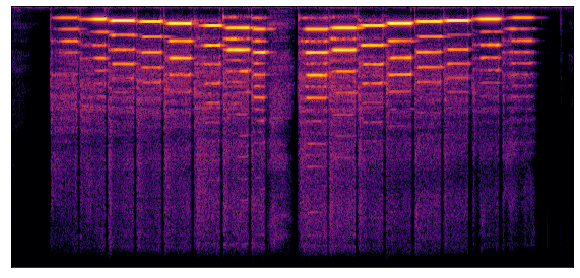

In [113]:
fig, ax = plt.subplots(figsize=(14,4.80))
plt.set_cmap('inferno')
ax.set_xticks([])
ax.set_yticks([])
plt.imshow(Y_spec)